In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import diffxpy.api as de
import os

In [2]:
files = os.listdir("./H5ADfiles/")

In [3]:
Remove = []
TgoodID = []
for i in open("./OUTPUT/Testis_Tgood_ID.txt","r").readlines():
    TgoodID.append(i.strip())

TpoorID = []
for i in open("./OUTPUT/Testis_Tpoor_ID.txt","r").readlines():
    TpoorID.append(i.strip())

print("There are "+str(len(TgoodID))+" subjects in Group A.")
print("There are "+str(len(TpoorID))+" subjects in Group B.\n")

There are 146 subjects in Group A.
There are 183 subjects in Group B.



In [4]:
myTissues=['AnnData_GTEx_v10_Whole Blood.h5ad',           
           #'AnnData_GTEx_v10_Adrenal Gland.h5ad',
           'AnnData_GTEx_v10_Lung.h5ad',
           'AnnData_GTEx_v10_Liver.h5ad',
           'AnnData_GTEx_v10_Stomach.h5ad',
           #'AnnData_GTEx_v10_Thyroid.h5ad',
           'AnnData_GTEx_v10_Heart - Left Ventricle.h5ad', 
           #'AnnData_GTEx_v10_Muscle - Skeletal.h5ad',
           #'AnnData_GTEx_v10_Adipose - Subcutaneous.h5ad',
           'AnnData_GTEx_v10_Adipose - Visceral (Omentum).h5ad', 
           #'AnnData_GTEx_v10_Spleen.h5ad',
           #'AnnData_GTEx_v10_Small Intestine - Terminal Ileum - Lymphoid Aggregate.h5ad',
           #'AnnData_GTEx_v10_Small Intestine - Terminal Ileum - Mixed Cell.h5ad',
           #'AnnData_GTEx_v10_Small Intestine - Terminal Ileum.h5ad',
           #'AnnData_GTEx_v10_Kidney - Cortex.h5ad',
           #'AnnData_GTEx_v10_Kidney - Medulla.h5ad',
           #'AnnData_GTEx_v10_Artery - Aorta.h5ad', 
           #'AnnData_GTEx_v10_Artery - Coronary.h5ad', 
           'AnnData_GTEx_v10_Artery - Tibial.h5ad', 
           #'AnnData_GTEx_v10_Esophagus - Mucosa.h5ad', 
           'AnnData_GTEx_v10_Nerve - Tibial.h5ad',
           #'AnnData_GTEx_v10_Pancreas - Acini.h5ad',
           #'AnnData_GTEx_v10_Pancreas - Islets.h5ad',
           #'AnnData_GTEx_v10_Pancreas.h5ad',
           #'AnnData_GTEx_v10_Prostate.h5ad',
           #'AnnData_GTEx_v10_Skin - Not Sun Exposed (Suprapubic).h5ad',
           'AnnData_GTEx_v10_Skin - Sun Exposed (Lower leg).h5ad',
           #'AnnData_GTEx_v10_Skin - Sun Exposed (Lower leg).h5ad', 
           #'AnnData_GTEx_v10_Colon - Sigmoid.h5ad',
           #'AnnData_GTEx_v10_Colon - Transverse.h5ad'，
           'AnnData_GTEx_v10_Testis.h5ad']

In [5]:
GroupG_SubjIDs = set(TgoodID)
GroupP_SubjIDs = set(TpoorID)
UsedTis = []
NonUsedTis = []

for file in myTissues:
    if file.count("AnnData_GTEx_v10_") == 1 and file.count(".h5ad") == 1:
        if file not in Remove:
            print(file)
            myadata = 0
            myadata = sc.read("./H5ADfiles/"+file)
            myadata = myadata[myadata.obs.DTHHRDY != 0.0] ###################注意
            AllID = myadata.obs.SUBJID.to_list()
            TmpA = GroupG_SubjIDs.intersection(set(AllID))
            TmpB = GroupP_SubjIDs.intersection(set(AllID))
            if min([len(TmpA),len(TmpB)]) < 5:
                print("$Group TestisGood subject numbers now is: "+str(len(list(TmpA)))+".")
                print("$Group TestisPoor subject numbers now is: "+str(len(list(TmpB)))+".")
                print("$ "+file+" is removed.\n")
                NonUsedTis.append(file)
            else:
                UsedTis.append(file)
                GroupG_SubjIDs = GroupG_SubjIDs.intersection(set(AllID))
                GroupP_SubjIDs = GroupP_SubjIDs.intersection(set(AllID))
                print("&&&&&&Group TestisGood subject numbers now is: "+str(len(list(GroupG_SubjIDs)))+".")
                print("&&&&&&Group TestisPoor subject numbers now is: "+str(len(list(GroupP_SubjIDs)))+".")
                print("&&&&&&&&&& "+file+" is used.\n")              
     
print("The tissues used here:")
print(UsedTis)
print("The tissues Non-used here:")
print(NonUsedTis)

AnnData_GTEx_v10_Whole Blood.h5ad
&&&&&&Group TestisGood subject numbers now is: 82.
&&&&&&Group TestisPoor subject numbers now is: 53.
&&&&&&&&&& AnnData_GTEx_v10_Whole Blood.h5ad is used.

AnnData_GTEx_v10_Lung.h5ad
&&&&&&Group TestisGood subject numbers now is: 61.
&&&&&&Group TestisPoor subject numbers now is: 44.
&&&&&&&&&& AnnData_GTEx_v10_Lung.h5ad is used.

AnnData_GTEx_v10_Liver.h5ad
&&&&&&Group TestisGood subject numbers now is: 37.
&&&&&&Group TestisPoor subject numbers now is: 20.
&&&&&&&&&& AnnData_GTEx_v10_Liver.h5ad is used.

AnnData_GTEx_v10_Stomach.h5ad
&&&&&&Group TestisGood subject numbers now is: 9.
&&&&&&Group TestisPoor subject numbers now is: 8.
&&&&&&&&&& AnnData_GTEx_v10_Stomach.h5ad is used.

AnnData_GTEx_v10_Heart - Left Ventricle.h5ad
&&&&&&Group TestisGood subject numbers now is: 7.
&&&&&&Group TestisPoor subject numbers now is: 5.
&&&&&&&&&& AnnData_GTEx_v10_Heart - Left Ventricle.h5ad is used.

AnnData_GTEx_v10_Adipose - Visceral (Omentum).h5ad
&&&&&&Grou

In [6]:
Tissues = []
Log2FC_less = []
Log2FC_larger = []
Total = []

myTisDiffResults = {}

for file in UsedTis:
    print("Analysing: $$$ "+file)
    myadata = sc.read("./H5ADfiles/"+file)
    myGenes = myadata.var["Symbol"].to_list()
    myadata.var_names = myGenes
    myadata.var_names_make_unique()
    
    AllID = myadata.obs.SUBJID.to_list()
    TGbool = [x in GroupG_SubjIDs for x in AllID]
    TPbool = [x in GroupP_SubjIDs for x in AllID]
    myadataTG = myadata[TGbool]
    myadataTP = myadata[TPbool]
    myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
    myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
    myadataGP = ad.concat([myadataTG, myadataTP], axis=0)
    myadataGP = myadataGP[myadataGP.obs.DTHHRDY != 0.0]    #############注意
    myadataGP.X = myadataGP.X.astype(np.float64)
    sc.pp.normalize_total(myadataGP, target_sum=1e4)
    sc.pp.log1p(myadataGP)
    
    test_results = de.test.two_sample(data=myadataGP, # AnnData 对象
                                      grouping=myadataGP.obs["Cluster"],  # 分组列（如细胞聚类结果）
                                      gene_names=myadataGP.var_names,
                                      test="rank")      # 基因名
    
    deg_table = test_results.summary()
    #significant_genes = deg_table[(deg_table["pval"] < 0.01) & (abs(deg_table["log2fc"]) > 0.5) & (deg_table["mean"]>0.01)]
    #significant_genes = deg_table[(deg_table["pval"] < 0.01) & (deg_table["mean"]>0.01)] #注意假阳性
    significant_genes = deg_table[(deg_table["pval"] < 0.01) & (deg_table["mean"]>0.01)] #注意假阳性
    significant_genes2 = significant_genes.sort_values(by='log2fc')
    myT = file.split(".h")[0]
    significant_genes2.to_csv("./OUTPUT/OtherOrgan."+myT+".DE.csv")
    myTisDiffResults[file] = deg_table
    myT2 = myT.split("_v10_")[1]
    Tissues.append(myT2)
    Log2FC_less.append(significant_genes2[significant_genes2['log2fc'] < 0].shape[0])
    Log2FC_larger.append(significant_genes2[significant_genes2['log2fc'] > 0].shape[0])
    Total.append(significant_genes2.shape[0])


myD = {"Tissue":Tissues,"log2fc < 0":Log2FC_less,"log2fc > 0":Log2FC_larger,"Total.dif":Total}
mydf = pd.DataFrame(myD)
mydf = mydf.sort_values(by='Total.dif')
mydf

Analysing: $$$ AnnData_GTEx_v10_Whole Blood.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/3716277846.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_7736/3716277846.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a

Analysing: $$$ AnnData_GTEx_v10_Lung.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/3716277846.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_7736/3716277846.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a

Analysing: $$$ AnnData_GTEx_v10_Liver.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/3716277846.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_7736/3716277846.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a

Analysing: $$$ AnnData_GTEx_v10_Stomach.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/3716277846.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_7736/3716277846.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a

Analysing: $$$ AnnData_GTEx_v10_Heart - Left Ventricle.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/3716277846.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_7736/3716277846.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a

Analysing: $$$ AnnData_GTEx_v10_Adipose - Visceral (Omentum).h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/3716277846.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_7736/3716277846.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a

Analysing: $$$ AnnData_GTEx_v10_Artery - Tibial.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/3716277846.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_7736/3716277846.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a

Analysing: $$$ AnnData_GTEx_v10_Nerve - Tibial.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/3716277846.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_7736/3716277846.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a

Analysing: $$$ AnnData_GTEx_v10_Skin - Sun Exposed (Lower leg).h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/3716277846.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_7736/3716277846.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a

Analysing: $$$ AnnData_GTEx_v10_Testis.h5ad


/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/3716277846.py:20: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTG.obs["Cluster"] = ["T.good"]*len(GroupG_SubjIDs)
/tmp/ipykernel_7736/3716277846.py:21: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  myadataTP.obs["Cluster"] = ["T.poor"]*len(GroupP_SubjIDs)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:617: FutureWarning: You are attempting to set `X` to a matrix on a

,Tissue,log2fc < 0,log2fc > 0,Total.dif
3,Stomach,2,3,5
4,Heart - Left Ventricle,7,0,7
0,Whole Blood,1,14,15
5,Adipose - Visceral (Omentum),14,13,27
6,Artery - Tibial,5,22,27
7,Nerve - Tibial,22,18,40
8,Skin - Sun Exposed (Lower leg),0,72,72
2,Liver,5,85,90
1,Lung,169,20,189
9,Testis,2494,4101,6595


In [7]:
len(GroupG_SubjIDs)

6

In [8]:
len(GroupP_SubjIDs)

5

In [9]:
mydf.to_csv("./OUTPUT/OtherOrgan.DE.csv")

In [10]:
mydf

,Tissue,log2fc < 0,log2fc > 0,Total.dif
3,Stomach,2,3,5
4,Heart - Left Ventricle,7,0,7
0,Whole Blood,1,14,15
5,Adipose - Visceral (Omentum),14,13,27
6,Artery - Tibial,5,22,27
7,Nerve - Tibial,22,18,40
8,Skin - Sun Exposed (Lower leg),0,72,72
2,Liver,5,85,90
1,Lung,169,20,189
9,Testis,2494,4101,6595


In [11]:
def transData(file,SubJG,SubJP):
    The_adata = sc.read("./H5ADfiles/"+file)
    myGenes = The_adata.var["Symbol"].to_list()
    The_adata.var_names = myGenes
    The_adata.var_names_make_unique()    
    AllID = The_adata.obs.SUBJID.to_list()
    TAbool = [x in SubJG for x in AllID]
    TBbool = [x in SubJP for x in AllID]
    The_adataTA = The_adata[TAbool]
    The_adataTB = The_adata[TBbool]
    The_adataTA.obs["Cluster"] = ["T.good"]*len(SubJG)
    The_adataTB.obs["Cluster"] = ["T.poor"]*len(SubJP)
    The_adataTATB = ad.concat([The_adataTA, The_adataTB], axis=0)
    
    The_adataTATB.X = The_adataTATB.X.astype(np.float64)
    sc.pp.normalize_total(The_adataTATB, target_sum=1e4)
    sc.pp.log1p(The_adataTATB)
    return The_adataTATB


def plotGene(The_adataTATB,TissueName,group,Gene,): 
    # 将数据转换为 DataFrame
    df = pd.DataFrame({
        'log(CPM + 1)': The_adataTATB[:,Gene].X.flatten(),  # 获取基因表达数据
        group: The_adataTATB.obs['Cluster']            # 分组信息
    })
    plt.close()
    plt.ioff()
    fig, ax = plt.subplots(figsize=(3, 4), constrained_layout=True)
    # 绘制箱线图
    sns.boxplot(
        data=df,
        x=group,
        y='log(CPM + 1)',
        width=0.5,
        #palette='Set2',       # 配色方案
        fill=False,
        showfliers=False,      # 是否显示离群点
        ax=ax
    )
    sns.swarmplot(
        data=df,
        x=group,
        y="log(CPM + 1)",
        hue="Cluster",          # 指定颜色分组列
        palette="Set2",
        size=5,
        alpha=0.7,
        ax=ax
    )

    ax.set_title(Gene, fontstyle="italic", color="black",fontsize=25)
    #plt.xticks(rotation=45)  # 旋转标签

    ax.set_ylabel('log(CPM + 1)',fontsize=20)
    ax.tick_params(axis='x', labelsize=20)
    ax.set_xlabel(TissueName,fontsize=20)
    save_path = "/mnt/h/GTEx/my_plots/Testis_"+TissueName+"."+Gene+".pdf"
    fig.savefig(save_path, dpi=300,transparent=False)
    plt.show(fig)
    plt.close(fig)



In [12]:
myTissues=['AnnData_GTEx_v10_Whole Blood.h5ad',           
           'AnnData_GTEx_v10_Lung.h5ad',
           'AnnData_GTEx_v10_Liver.h5ad',
           'AnnData_GTEx_v10_Stomach.h5ad',
           'AnnData_GTEx_v10_Heart - Left Ventricle.h5ad', 
           'AnnData_GTEx_v10_Adipose - Visceral (Omentum).h5ad', 
           'AnnData_GTEx_v10_Artery - Tibial.h5ad', 
           'AnnData_GTEx_v10_Nerve - Tibial.h5ad',
           'AnnData_GTEx_v10_Skin - Sun Exposed (Lower leg).h5ad',
           'AnnData_GTEx_v10_Testis.h5ad']

In [13]:
myFiles={"Whole Blood":'AnnData_GTEx_v10_Whole Blood.h5ad',           
           "Lung":'AnnData_GTEx_v10_Lung.h5ad',
           "Liver":'AnnData_GTEx_v10_Liver.h5ad',
           "Stomach":'AnnData_GTEx_v10_Stomach.h5ad',
           "Heart":'AnnData_GTEx_v10_Heart - Left Ventricle.h5ad', 
           "Adipose":'AnnData_GTEx_v10_Adipose - Visceral (Omentum).h5ad', 
           "Artery":'AnnData_GTEx_v10_Artery - Tibial.h5ad', 
           "Nerve":'AnnData_GTEx_v10_Nerve - Tibial.h5ad',
           "Skin":'AnnData_GTEx_v10_Skin - Sun Exposed (Lower leg).h5ad',
           "Testis":'AnnData_GTEx_v10_Testis.h5ad'}

In [14]:
mySkin = transData('AnnData_GTEx_v10_Skin - Sun Exposed (Lower leg).h5ad',GroupG_SubjIDs, GroupP_SubjIDs)
myNerve = transData('AnnData_GTEx_v10_Nerve - Tibial.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)
myArtery = transData('AnnData_GTEx_v10_Artery - Tibial.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)
myHeart = transData('AnnData_GTEx_v10_Heart - Left Ventricle.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)
myLiver = transData('AnnData_GTEx_v10_Liver.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)
myTestis = transData('AnnData_GTEx_v10_Testis.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)
myWholeBlood = transData('AnnData_GTEx_v10_Whole Blood.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)
myStomach = transData('AnnData_GTEx_v10_Stomach.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)
myAdipose = transData('AnnData_GTEx_v10_Adipose - Visceral (Omentum).h5ad',GroupG_SubjIDs, GroupP_SubjIDs)
myLung = transData('AnnData_GTEx_v10_Lung.h5ad',GroupG_SubjIDs, GroupP_SubjIDs)

/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD115-1', 'SNORD115-2', 'SNORD115-3', 'SNORD115-4', 'SNORD115-5']
  warnings.warn(
/tmp/ipykernel_7736/2193475084.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  The_adataTA.obs["Cluster"] = ["T.good"]*len(SubJG)
/tmp/ipykernel_7736/2193475084.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  The_adataTB.obs["Cluster"] = ["T.poor"]*len(SubJP)
/home/majunyu/anaconda3/lib/python3.12/site-packages/anndata/utils.py:264: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index value

In [15]:
myTisAdata = {"Whole Blood":myWholeBlood,           
              "Lung":myLung,
              "Liver":myLiver,
              "Stomach":myStomach,
              "Heart":myHeart, 
              "Adipose":myAdipose, 
              "Artery":myArtery, 
              "Nerve":myNerve,
              "Skin":mySkin,
              "Testis":myTestis}

In [16]:
def searchGenePvalues(Gene):
    myPs = {}
    for t in myFiles.keys():
        f = myFiles[t]
        diff = myTisDiffResults[f]
        p = diff[diff.gene == Gene].pval
        myPs[t] = float(p)

    return myPs
    

In [17]:
searchGenePvalues("TMDD1")

/tmp/ipykernel_7736/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)


{'Whole Blood': 0.7652104751907526,
 'Lung': 0.5367965367965368,
 'Liver': 0.004329004329004329,
 'Stomach': 0.42857142857142855,
 'Heart': 0.24675324675324672,
 'Adipose': 0.17748917748917747,
 'Artery': 0.46419164680396885,
 'Nerve': 0.17748917748917747,
 'Skin': 0.32900432900432897,
 'Testis': 0.004329004329004329}

In [18]:
#plotGene(myTestis,"Testis","Cluster","TMDD1")
#plotGene(myLiver,"Liver","Cluster","TMDD1")
#plotGene(myLung,"Lung","Cluster","TMDD1")
#plotGene(myWholeBlood,"Whole Blood","Cluster","TMDD1")
#plotGene(myStomach,"Stomach","Cluster","TMDD1")
#plotGene(myAdipose,"Adipose","Cluster","TMDD1")
#plotGene(mySkin,"Skin","Cluster","TMDD1")
#plotGene(myNerve,"Nerve","Cluster","TMDD1")
#plotGene(myArtery,"Artery","Cluster","TMDD1")
#plotGene(myHeart,"Heart","Cluster","TMDD1")

In [19]:
def plotTheGene(gene):
    plotGene(myTestis,"Testis","Cluster",gene)
    plotGene(myLiver,"Liver","Cluster",gene)
    plotGene(myLung,"Lung","Cluster",gene)
    plotGene(myWholeBlood,"Whole Blood","Cluster",gene)
    plotGene(myStomach,"Stomach","Cluster",gene)
    plotGene(myAdipose,"Adipose","Cluster",gene)
    plotGene(mySkin,"Skin","Cluster",gene)
    plotGene(myNerve,"Nerve","Cluster",gene)
    plotGene(myArtery,"Artery","Cluster",gene)
    plotGene(myHeart,"Heart","Cluster",gene)

In [20]:
#plotTheGene("REELD1")

In [21]:
#plotTheGene("CCR1")

In [22]:
#plotTheGene("FGA")

In [23]:
#plotTheGene("PCSK9")

In [24]:
#plotTheGene("CYP4X1")

In [25]:
#plotGene(myTestis,"Testis","Cluster","CYP4Z1")
#plotGene(myLung,"Lung","Cluster","CYP4Z1")

In [26]:
#plotTheGene("GABRE")

In [27]:
#plotTheGene("RCAN2")

In [28]:
#plotTheGene("PTP4A3")

In [29]:
#plotTheGene("HTRA3")

In [30]:
#plotTheGene("PNMT")

In [31]:
#plotTheGene("XAGE2")

In [32]:
#plotTheGene("MSMO1")

In [33]:
#plotTheGene("EGR2")

In [34]:
#plotTheGene("SQLE")

In [35]:
#plotTheGene("DAB2")

In [36]:
myLung.obs

,SMPTHNTS,SMTSD,SUBJID,SEX,AGE,DTHHRDY,Cluster
GTEX-11ZUS-0126-SM-5EQM5,"2 pieces, alveolar hemorrhage, edema, emphysem...",Lung,GTEX-11ZUS,1.0,30-39,1.0,T.good
GTEX-12696-1026-SM-5FQUV,"2 pieces, moderate congestion",Lung,GTEX-12696,1.0,60-69,3.0,T.good
GTEX-17HII-0926-SM-79ON7,"2 pieces, moderate-severe alveolar edema/conge...",Lung,GTEX-17HII,1.0,50-59,2.0,T.good
GTEX-17MF6-0826-SM-7LT8F,2 pieces; moderate congestion,Lung,GTEX-17MF6,1.0,40-49,2.0,T.good
GTEX-1B8L1-0626-SM-7EPHL,"2 pieces, marked congestion",Lung,GTEX-1B8L1,1.0,60-69,2.0,T.good
GTEX-1JMLX-0926-SM-CNNPQ,2 pieces; numerous pigmented alveolar macrophages,Lung,GTEX-1JMLX,1.0,50-59,2.0,T.good
GTEX-13OW6-0826-SM-5L3GA,2 pieces; some congestion/hemorrhage and emphy...,Lung,GTEX-13OW6,1.0,50-59,2.0,T.poor
GTEX-14E7W-1326-SM-5RQIV,2 pieces; congestion and focal atelectasis,Lung,GTEX-14E7W,1.0,70-79,2.0,T.poor
GTEX-18A66-0926-SM-718BG,"2 pieces, minimal congestion",Lung,GTEX-18A66,1.0,60-69,4.0,T.poor
GTEX-1KD5A-1126-SM-CXZK6,"2 pieces; includes few larger vessels, many pi...",Lung,GTEX-1KD5A,1.0,50-59,2.0,T.poor


In [37]:
#plotTheGene("MILR1")

In [38]:
#plotTheGene("BLNK")

In [39]:
#plotTheGene("PI15")

In [40]:
#plotTheGene("CLEC4G")

In [41]:
#plotTheGene("NCAPG")

In [42]:
#plotTheGene("ACHE")

In [43]:
#plotTheGene("CASQ1")

In [44]:
#plotTheGene("SLC2A8")

In [47]:
mydf

,Tissue,log2fc < 0,log2fc > 0,Total.dif
3,Stomach,2,3,5
4,Heart - Left Ventricle,7,0,7
0,Whole Blood,1,14,15
5,Adipose - Visceral (Omentum),14,13,27
6,Artery - Tibial,5,22,27
7,Nerve - Tibial,22,18,40
8,Skin - Sun Exposed (Lower leg),0,72,72
2,Liver,5,85,90
1,Lung,169,20,189
9,Testis,2494,4101,6595


In [48]:
myTis = ["Testis", "Lung","Liver","Skin","Nerve", "Artery","Adipose", "Whole Blood","Heart","Stomach"]

In [199]:
def PlotOneGene(Gene,bbox_to_anchor=(0.01, 1)):
    myTisDf = pd.DataFrame(columns=['log(CPM + 1)', 'Group', 'Tissue'])
    for k in myTisAdata.keys():
        The_adataTATB = myTisAdata[k]
        df = pd.DataFrame({
            'log(CPM + 1)': The_adataTATB[:,Gene].X.flatten(),  # 获取基因表达数据
            'Group': The_adataTATB.obs['Cluster'],            # 分组信息
            'Tissue':k
        })
        myTisDf = pd.concat([myTisDf, df], ignore_index=True)

    fig, ax = plt.subplots(figsize=(9, 5), constrained_layout=True)

    myorder = myTis
    # 绘制箱线图（显示中位数、四分位数等）
    sns.boxplot(
        data=myTisDf,
        x='Tissue', y='log(CPM + 1)', hue='Group',
        order=myorder,
        palette="Set1",
        #width=0.5,
        dodge = 2,
        gap=0.05,
        showfliers=False,
        legend=False,fill=False
    )

    # 绘制点图（显示数据分布）
    sns.stripplot(
        x='Tissue', y='log(CPM + 1)', hue='Group',
        order=myorder,
        palette="Set1",
        data=myTisDf,
        dodge =0.05,
        jitter=0.2, alpha=0.5, size=6
    )
    
    current_ylim = ax.get_ylim()
    extension_factor = 1.45  
    # 设置新的y轴范围
    ax.set_ylim(current_ylim[0], current_ylim[1]*extension_factor)
    
    #加p值
    TheY = current_ylim[1]
    myPvalues = searchGenePvalues(Gene)
    for k in myorder:
        p_value = myPvalues[k]
        # 添加p值文本
        x_position = list(myorder).index(k)
        myd = myTisDf[myTisDf["Tissue"]==k]
        ymax = myd['log(CPM + 1)'].max()
        mf = 1.3
        if 2*ymax > TheY and 1.5*ymax <= TheY:
            mf = 1.5
            #print("$")
        if 5*ymax > TheY and 2*ymax <= TheY:
            mf = 2.2
            #print("A")
        if 10*ymax > TheY and 5*ymax <= TheY:
            mf = 4
        if 20*ymax > TheY and 10*ymax <= TheY:
            mf = 6
            #print("B")
        if 50*ymax > TheY and 20*ymax <= TheY:
            mf = 12
        if 100*ymax > TheY and 50*ymax <= TheY:
            mf = 24
        if 100*ymax <= TheY:
            mf = 100
        
        if p_value < 0.001:
            ax.text(x_position, ymax*mf, 
               f"p={p_value:.2e}", 
               ha='center',
               rotation=70,          # 旋转角度
               va='center',          # 垂直居中
               size=13)
        else:
            ax.text(x_position, ymax*mf, 
               f"p={p_value:.4f}", 
               ha='center',
               rotation=70,          # 旋转角度
               va='center',          # 垂直居中
               size=13)

    # 添加图例和标题
    plt.title(Gene,size=25)
    plt.xlabel('')
    plt.ylabel('log(CPM + 1)',size=20)
    plt.legend(bbox_to_anchor=bbox_to_anchor,
               loc='upper left',
               fontsize='x-large',
               title =None,
               edgecolor="black")
    plt.xticks(rotation=45,ha='right',rotation_mode='anchor',size=15)
    plt.tight_layout()
    save_path = "/mnt/h/GTEx/my_plots/Box_Strip_"+Gene+".pdf"
    fig.savefig(save_path, dpi=300,transparent=False)
    plt.show(fig)
    plt.close(fig)

    return myTisDf

/tmp/ipykernel_7736/185702798.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_7736/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_7736/185702798.py:96: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


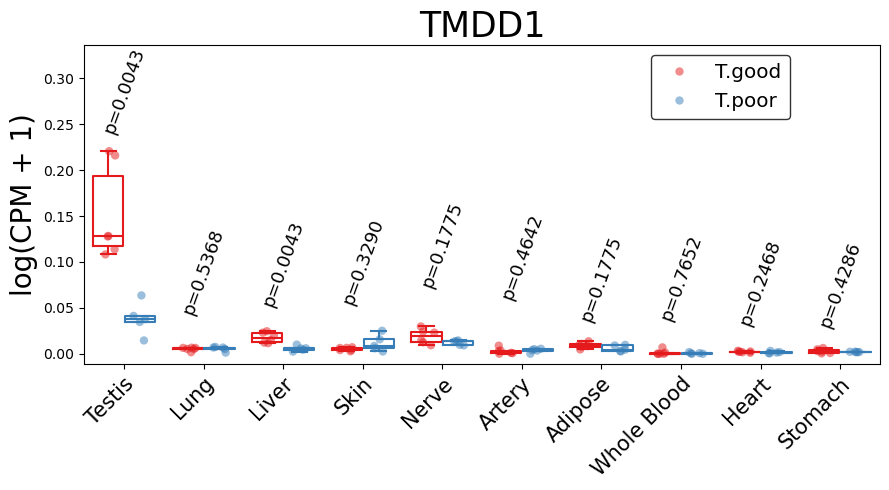

In [194]:
tmp = PlotOneGene("TMDD1",bbox_to_anchor=(0.7, 1))

/tmp/ipykernel_7736/185702798.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_7736/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_7736/185702798.py:96: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


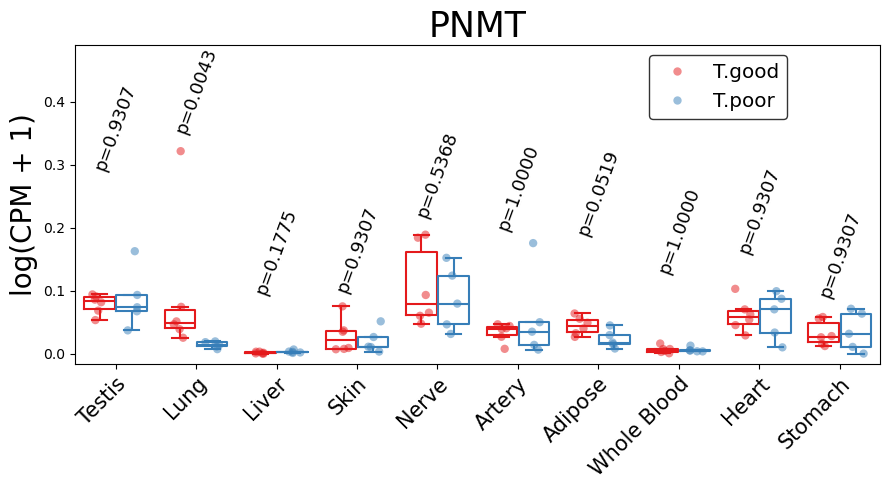

In [195]:
tmp = PlotOneGene("PNMT",bbox_to_anchor=(0.7, 1))

/tmp/ipykernel_7736/185702798.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_7736/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_7736/185702798.py:96: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


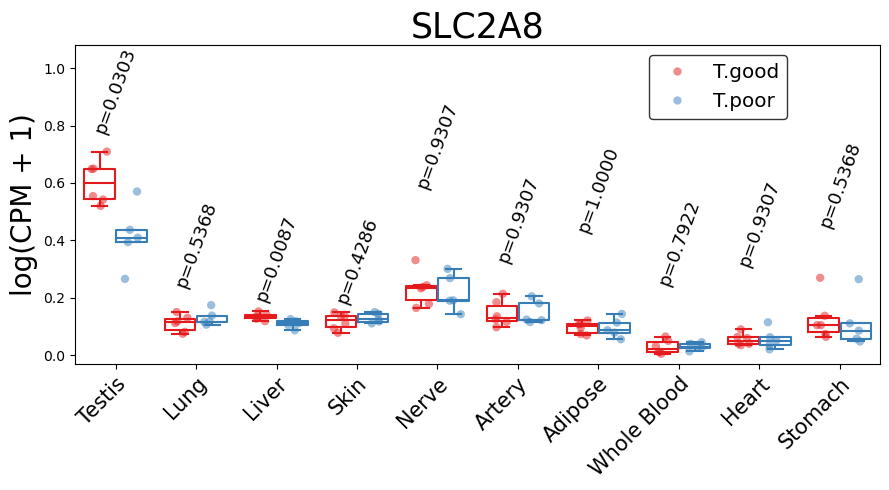

In [196]:
tmp = PlotOneGene("SLC2A8",bbox_to_anchor=(0.7, 1))

/tmp/ipykernel_7736/185702798.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_7736/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_7736/185702798.py:96: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


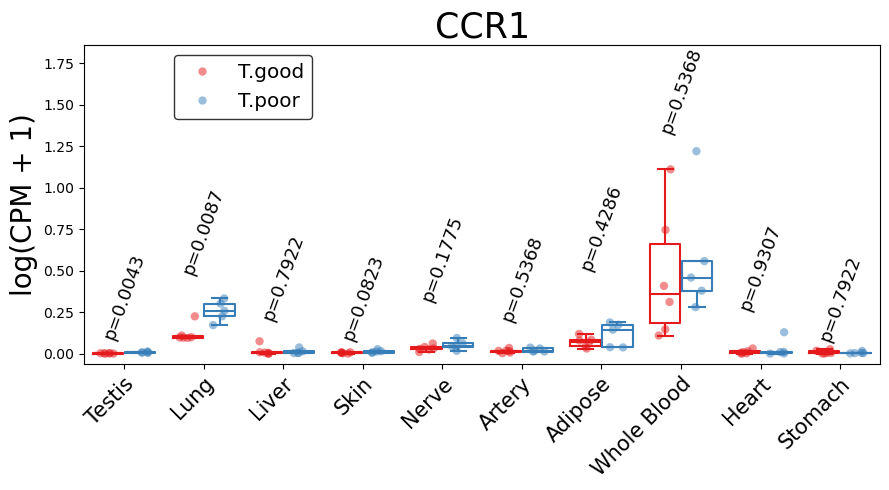

In [197]:
tmp = PlotOneGene("CCR1",bbox_to_anchor=(0.1, 1))

/tmp/ipykernel_7736/1923477991.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  myTisDf = pd.concat([myTisDf, df], ignore_index=True)
/tmp/ipykernel_7736/100698177.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myPs[t] = float(p)
/tmp/ipykernel_7736/1923477991.py:96: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


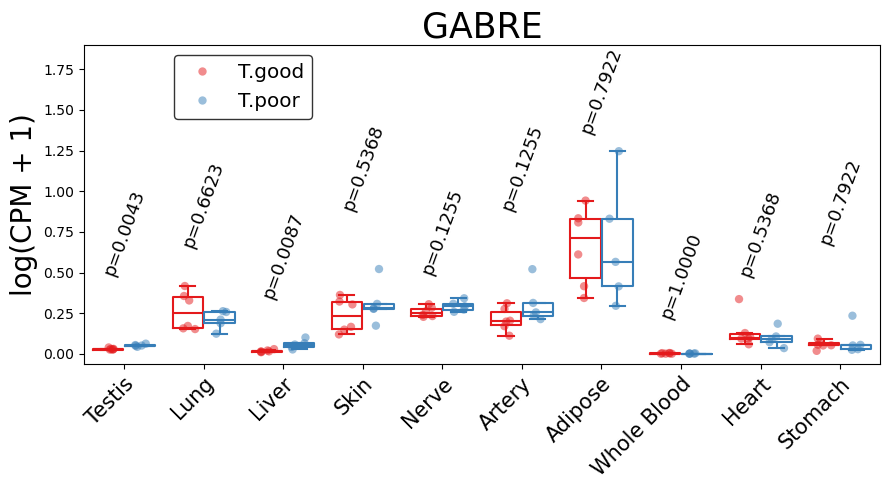

In [200]:
tmp = PlotOneGene("GABRE",bbox_to_anchor=(0.1, 1))